Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

Check out the data

In [2]:
house_price_dataset = pd.read_csv("/content/drive/MyDrive/USA_Housing.csv")

In [3]:
house_price_dataset.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

# New section

In [4]:
house_price_dataset.shape

(5000, 7)

In [5]:
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
house_price_dataset.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [7]:
house_price_dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
#check for missing values
house_price_dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

**Exploratory Data Analysis (EDA)**

In [9]:
sns.pairplot(house_price_dataset)

In [ ]:
house_price_dataset.hvplot.hist(by='Price',subplots=False,width=1000)

In [11]:
house_price_dataset.hvplot.hist("Price")

:Histogram   [Price]   (Price_count)

<Axes: xlabel='Price', ylabel='Count'>

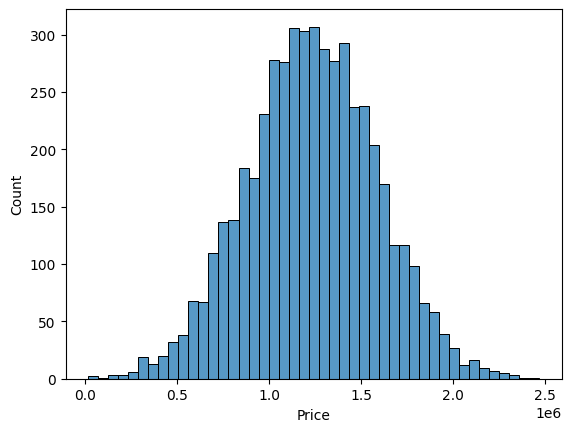

In [12]:
sns.histplot(data=house_price_dataset.Price)

<Axes: ylabel='Count'>

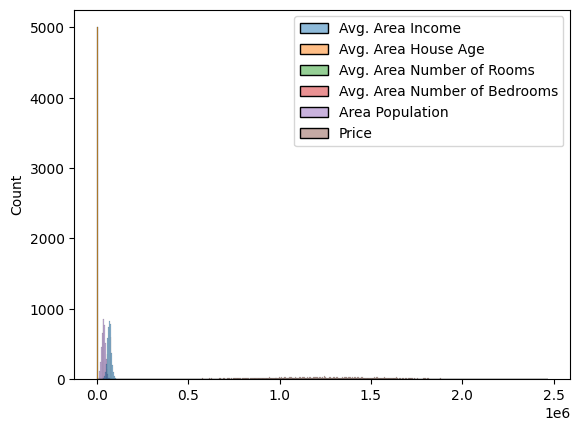

In [13]:
#sns.set(rc={'figure.figsize':(5,3)})
sns.histplot(house_price_dataset)

In [14]:
house_price_dataset.Price


0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

<ipython-input-15-7098d4588721>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_price_dataset.corr(), annot=True)


<Axes: >

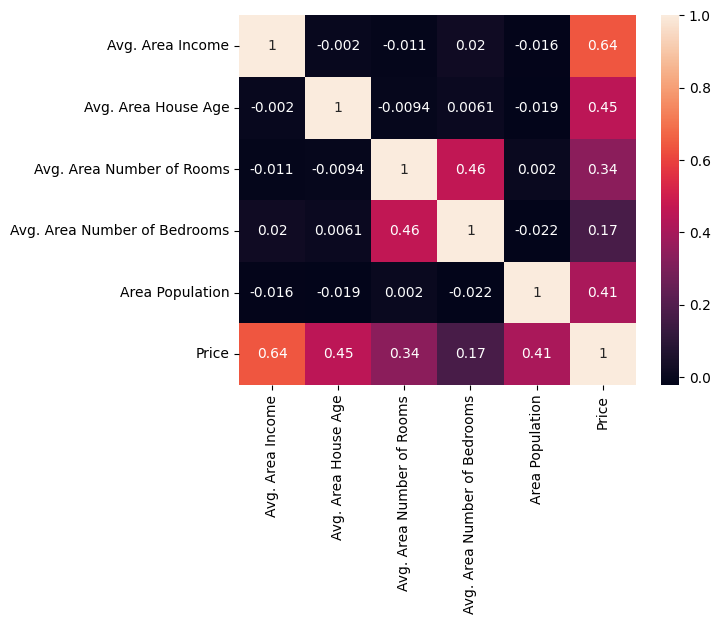

In [15]:
sns.heatmap(house_price_dataset.corr(), annot=True)

**Training a Linear Regression Model**

X and Y arrays

In [16]:
X=house_price_dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y=house_price_dataset['Price']

**Train Test Split**

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_tes=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
  pred=cross_val_score(model,X,y,cv=10)
  return pred.mean()
def print_evaluate(true, predicted):
  mae=metrics.mean_absolute_error(true, predicted)
  mse=metrics.mean_squared_error(true, predicted)
  rmse=np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square=metrics.r2_score(true, predicted)
  print('MAE:', mae)
  print('MSE:', mse)
  print('RMSE:', rmse)
  print('R2 Square', r2_square)
  print('___________________________')
def evaluate(true, predicted):
  mae=metrics.mean_absolute_error(true, predicted)
  mse=metrics.mean_squared_error(true,predicted)
  rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
  r2_square=metrics.r2_score(true,predicted)
  return mae,mse,rmse,r2_square

**Preparing Data For Linear Regression**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ ('std_scaler', StandardScaler())])

X_train=pipeline.fit_transform(X_train)
X_test=pipeline.transform(X_test)

**Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

**Model Evalution**
Let's evalute the model by checking out it's coefficients and how we can intercept them.

In [21]:
#print the intercept
print(lin_reg.intercept_)

1228219.1492415662


In [22]:
coeff_df=pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income              232679.724643
Avg. Area House Age           163841.046593
Avg. Area Number of Rooms     121110.555478
Avg. Area Number of Bedrooms    2892.815119
Area Population               151252.342377

In [23]:
pred=lin_reg.predict(X_test)

In [24]:
pd.DataFrame({'True Values': y_tes, 'Predicted Values': pred}).hvplot.scatter(x='True Values',y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [25]:
pd.DataFrame({'Error Values': (y_tes-pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [26]:
test_pred=lin_reg.predict(X_test)
train_pred=lin_reg.predict(X_train)

print('Test set evalution:\n____________________________________________')
print_evaluate(y_tes,test_pred)
print('Train set evaluton:\n____________________________________________')
print_evaluate(y_train,train_pred)
results_df=pd.DataFrame(data=[["Linear Regression", *evaluate(y_tes, test_pred), cross_val(LinearRegression())]],columns=['Model','MAE','MSE','RMSE','R2 Square', "Cross Validation"])

Test set evalution:
____________________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
___________________________
Train set evaluton:
____________________________________________
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
___________________________


Robust Regression

In [27]:
from sklearn.linear_model import RANSACRegressor

model= RANSACRegressor (base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred=model.predict(X_train)

print('Test set evalution:\n_____________________________________________')
print_evaluate(y_tes, test_pred)
print('=======================================')
print('Train set evaluation:\n______________________________________________')
print_evaluate(y_train,train_pred)

results_df_2=pd.DataFrame(data=[["Robust Regression", *evaluate (y_tes, test_pred), cross_val(RANSACRegressor())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross validation"])
results_df=results_df.append(results_df_2, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


Test set evalution:
_____________________________________________
MAE: 83461.11441172272
MSE: 10826948773.617777
RMSE: 104052.62502031257
R2 Square 0.9082542239220648
___________________________
Train set evaluation:
______________________________________________
MAE: 84215.14195015775
MSE: 10919364262.715544
RMSE: 104495.76193662375
R2 Square 0.9143381303073199
___________________________


<ipython-input-27-9889222c76f5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df=results_df.append(results_df_2, ignore_index=True)


**Ridge Regression**

In [29]:
from sklearn.linear_model import Ridge

model=Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred=model.predict(X_test)

test_pred=model.predict(X_test)
train_pred=model.predict(X_train)

print('Test set evaluation:\n_________________________________________________')
print_evaluate(y_tes, test_pred)
print('==================================')
print('Train set evaluation:\n________________________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_tes, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_________________________________________________
MAE: 81428.64835535336
MSE: 10153269900.892609
RMSE: 100763.43533689494
R2 Square 0.9139628674464607
___________________________
Train set evaluation:
________________________________________________
MAE: 81972.39058585507
MSE: 10382929615.143456
RMSE: 101896.66145239232
R2 Square 0.9185464334441484
___________________________


<ipython-input-29-358ef1b6c489>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


**LASSO Regresssion**

In [33]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,
              precompute=True,
#               warm_start=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_tes, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_tes, test_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364523
RMSE: 100341.68321472648
R2 Square 0.914681588551116
___________________________
Train set evaluation:
_____________________________________
MAE: 81480.63002185506
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505
___________________________


<ipython-input-33-0f60150cf142>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


In [55]:
results_df

MAE           MSE           RMSE  R2 Square  \
Model                                                                     
Linear Regression  81135.566093  1.006842e+10  100341.529545   0.914682   
Robust Regression  83461.114412  1.082695e+10  104052.625020   0.908254   
Ridge Regression   81428.648355  1.015327e+10  100763.435337   0.913963   
Lasso Regression   81135.698517  1.006845e+10  100341.683215   0.914682   

                   Cross Validation  Cross validation  
Model                                                  
Linear Regression          0.917379               NaN  
Robust Regression               NaN           0.91268  
Ridge Regression           0.917379               NaN  
Lasso Regression           0.917379               NaN

In [60]:
results_df.columns

Index(['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation',
       'Cross validation'],
      dtype='object')

In [68]:
results_df=results_df.reset_index()

**Model Comparison**

<Axes: ylabel='Model'>

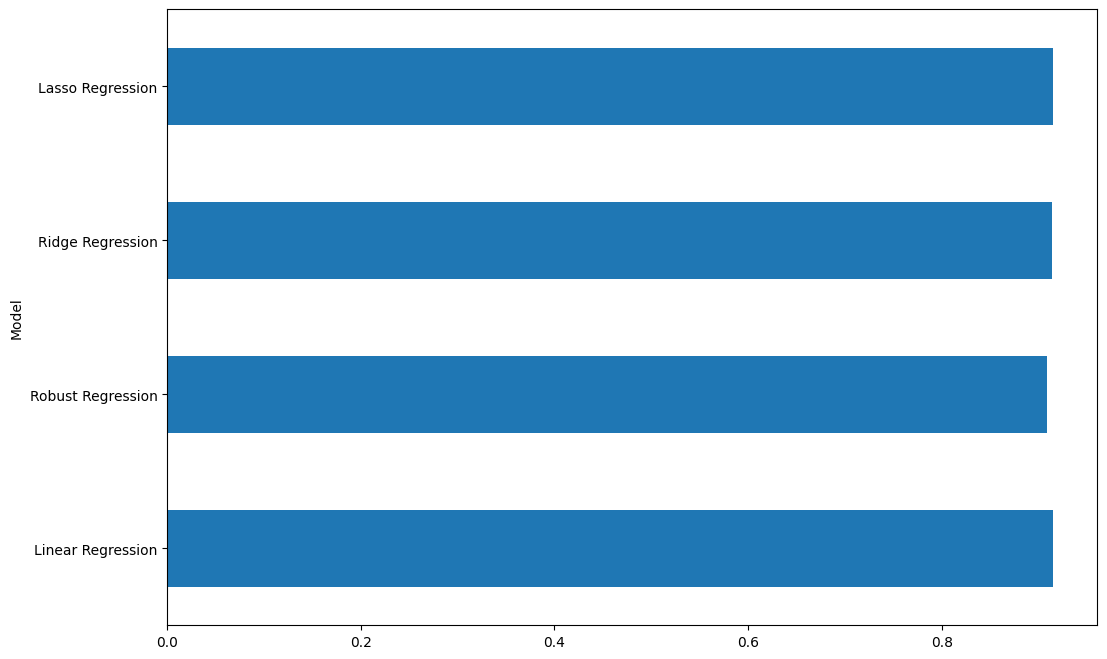

In [69]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

In [77]:
model.predict(X_test)

1308533.8356186203

In [86]:
model.predict([[90499.05745,	6.384358921,	4.242191302	,3.04,	33970.16499]])

array([2.6198131e+10])